In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    'there is no POM in this directory',
]
pa = ProjectAnalysis("Time",  1)

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix
0,0,9a62b06b,SUCCESS,12,Fix NPE in Partial.with(),{}
1,1,8612f9e5,SUCCESS,11,Fix NPE in Partial.with(),{}
2,2,8d109fe1,SUCCESS,12,Adding zero no longer changes the offset durin...,{}
3,3,3ba9ba79,SUCCESS,12,Prevent creation of invalid partials via Parti...,{}
4,4,bcb04466,SUCCESS,12,Fix NPE in DateTimeUtils.isContiguous with wei...,{}


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           224
commit       224
build        224
exec_time    224
comment      224
fix          224
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           1493
commit       1493
build        1493
exec_time    1493
comment      1493
fix          1493
dtype: int64

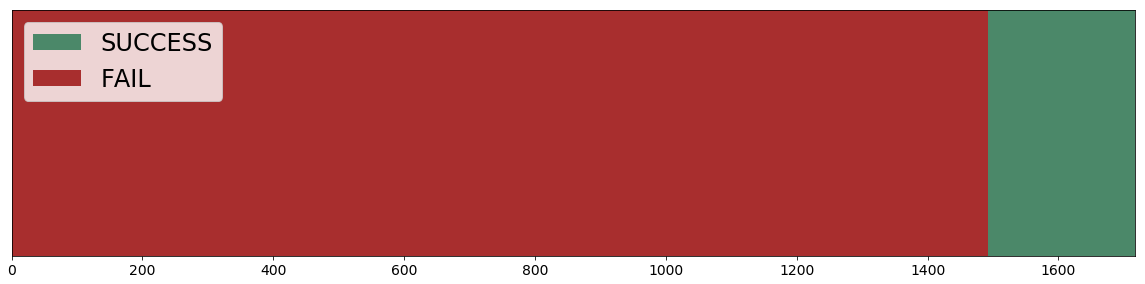

In [6]:
pa.plot_and_save_histogram(1)

## We collect all the fails, separate them in groups and obtain the logs of each commit for failed builds

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df=df.groupby(['key','trace']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)
df.to_csv("%s_errors.csv"%pa.project, sep='\t', encoding='utf-8')
df

,,count
key,trace,
25fe7d356a79255e6eb2a6bca03a5f19,there is no POM in this directory,1493


In [10]:
pa.view_log_by_hash(errors,'25fe7d356a79255e6eb2a6bca03a5f19', 0)

Total commits: 1493 | Current commit: 72b22654 | Log: 

[INFO] Scanning for projects...
[INFO] ------------------------------------------------------------------------
[INFO] BUILD FAILURE
[INFO] ------------------------------------------------------------------------
[INFO] Total time: 0.073 s
[INFO] Finished at: 2019-01-14T14:33:54+01:00
[INFO] Final Memory: 8M/303M
[INFO] ------------------------------------------------------------------------
[ERROR] The goal you specified requires a project to execute but there is no POM in this directory (/home/michel/Investigacion/bugs/projects/Time). Please verify you invoked Maven from the correct directory. -> [Help 1]
[ERROR] 
[ERROR] To see the full stack trace of the errors, re-run Maven with the -e switch.
[ERROR] Re-run Maven using the -X switch to enable full debug logging.
[ERROR] 
[ERROR] For more information about the errors and possible solutions, please read the following articles:
[ERROR] [Help 1] http://cwiki.apache.org/confluenc

In [11]:
pa.save_success_commits()

Saved at '../Time/experiment_1/success_commits.txt'
